In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL\train.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Dropping Cabin asit is not needed
df.drop("Cabin", axis=1, inplace=True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df["Age"].fillna(df["Age"].median(), inplace=True)

mode_value = df["Embarked"].mode()
if not mode_value.empty:
    df["Embarked"] = df["Embarked"].fillna(mode_value[0])
else:
    df["Embarked"] = df["Embarked"].fillna("S")

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

#### Distribution of Survived vs Not Survived

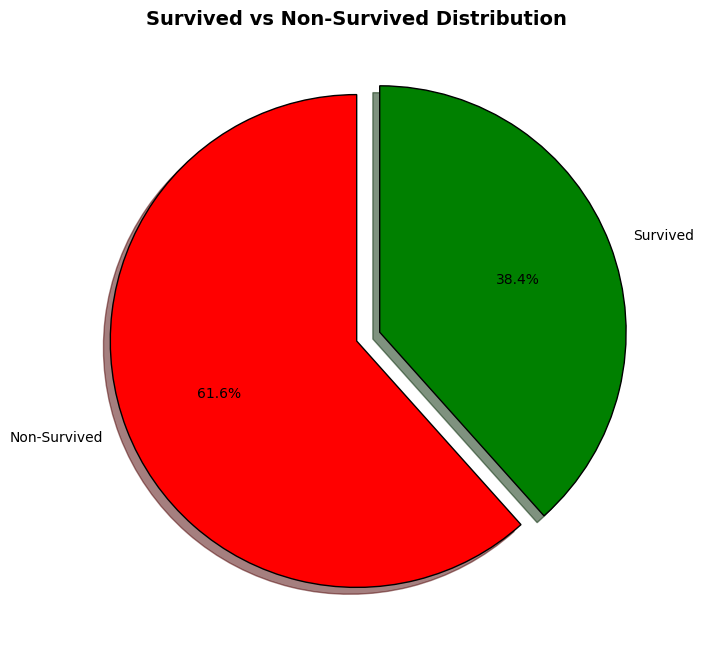

In [48]:
import matplotlib.pyplot as plt

# Calculate the counts for survived and non-survived
non_survived = df[df['Survived'] == 0].shape[0]
survived = df[df['Survived'] == 1].shape[0]

# Data and labels
data = [non_survived, survived]
labels = ["Non-Survived", "Survived"]

# Colors for the pie chart
colors = ['red', 'green']  # Red for Non-Survived, Green for Survived

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    data, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    explode=(0, 0.1),  # Slightly separate the 'Survived' slice
    shadow=True,       # Add shadow for an interactive feel
    wedgeprops={'edgecolor': 'black'}  # Add border to the wedges
)

# Add a title
plt.title("Survived vs Non-Survived Distribution", fontsize=14, fontweight='bold')

# Show the pie chart
plt.show()


In [14]:
#!pip install mplcursors

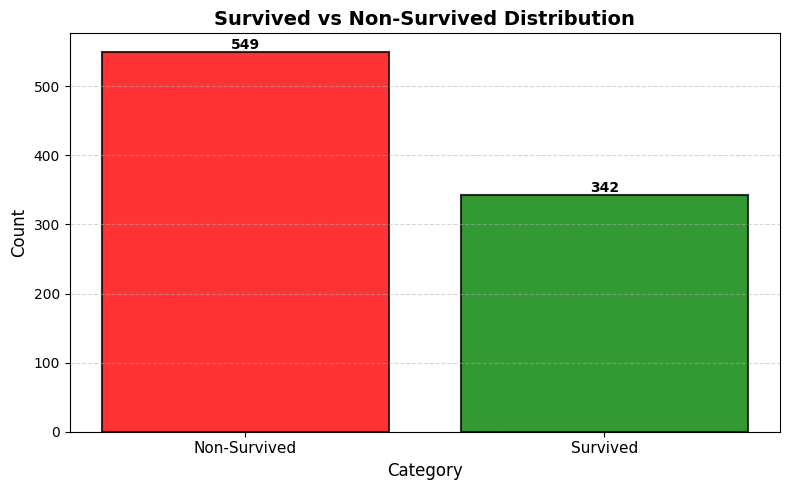

In [29]:
import matplotlib.pyplot as plt
import mplcursors  # This is a library for interactive cursor effects

# Separating the data for each category
non_survived = df[df['Survived'] == 0]
survived = df[df['Survived'] == 1]

# Counting the number of non-survived and survived
count_non_survived = len(non_survived)
count_survived = len(survived)

# Creating bar positions
categories = ['Non-Survived', 'Survived']
counts = [count_non_survived, count_survived]
x_positions = range(len(categories))

# Creating the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(
    x_positions, 
    counts, 
    color=['red', 'green'], 
    alpha=0.8, 
    edgecolor='black', 
    linewidth=1.5
)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 1,  # Adjusting position slightly above the bar
        f'{height}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add title, labels, and xticks
plt.title('Survived vs Non-Survived Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(x_positions, categories, fontsize=11)

# Add a cursor for interactivity
cursor = mplcursors.cursor(bars, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {counts[sel.index]}"))

# Show the plot
plt.tight_layout()  # Adjusting layout for better spacing
plt.show()


## Distriboution by Gender

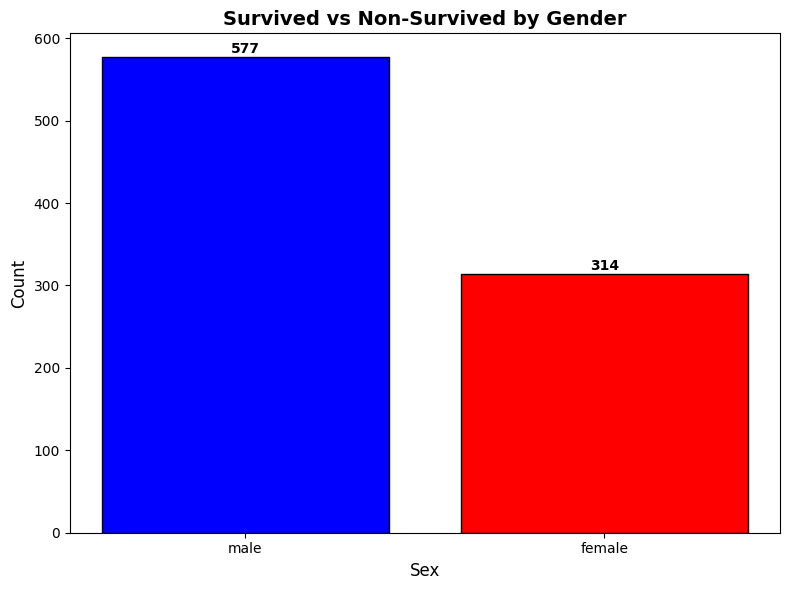

In [38]:
# Grouping the data by 'Sex' and count
sex_counts = df['Sex'].value_counts()

# Custom colors for each gender
colors = ['red' if sex == 'female' else 'blue' for sex in sex_counts.index]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color=colors, edgecolor='black')

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 1,  # Position slightly above the bar
        f'{height}', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        fontweight='bold'
    )

# Adding interactive hover effect
cursor = mplcursors.cursor(bars, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {int(sel.target[1])}"))

# Adding title and labels
plt.title('Survived vs Non-Survived by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Showing the plot
plt.tight_layout()
plt.show()
